In [4]:
import cv2
import numpy as np
from pycocotools.coco import COCO
from skimage import io
import os
from config import config
from transformer import Transformer, AugmentSelection
from matplotlib import pyplot as plt
import tensorflow as tf
from dataset.generators import get_dataset
from dataset.label_maps import PredictionData
ds_train, ds_train_size = get_dataset(config.VAL_ANNO_FILE, config.VAL_IMG_DIR, config.BATCH_SIZE,True, config.IMAGE_SHAPE)

loading annotations into memory...
Done (t=0.16s)
creating index...
index created!
Loading image annot 0/5000
Loading image annot 2000/5000
Loading image annot 4000/5000
[0321 12:20:17 @argtools.py:138] WRN "import prctl" failed! Install python-prctl so that processes can be cleaned with guarantee.


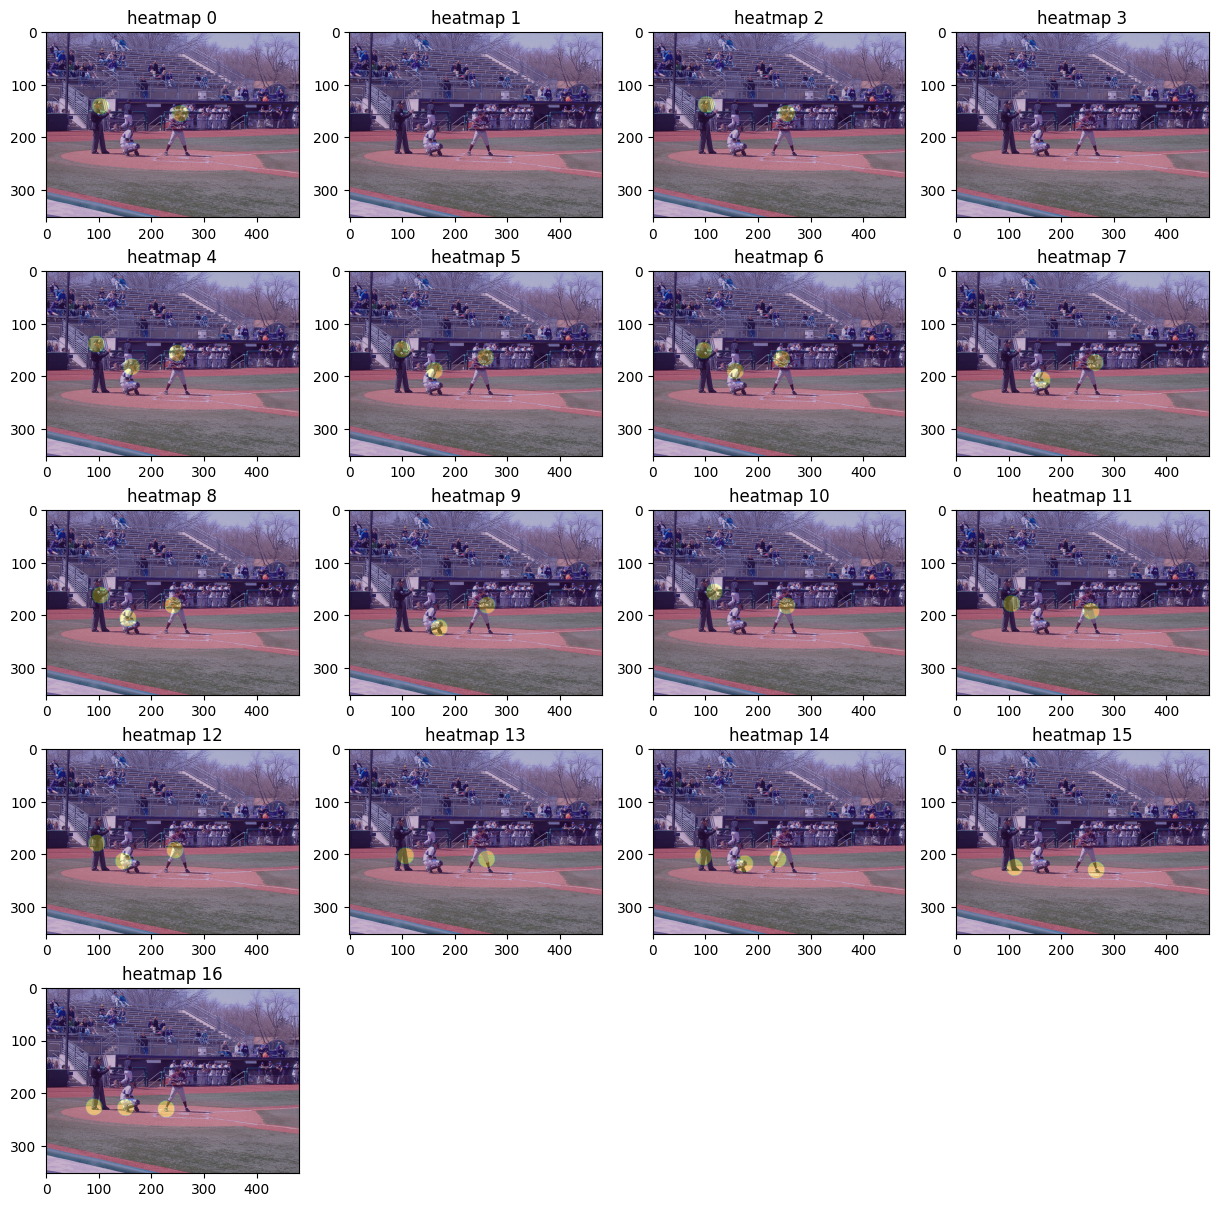

In [5]:
pred_data = None
kp_heatmaps = None
img = None
for x,y in ds_train:
    pred_data = PredictionData(tf.squeeze(y, axis=0))
    kp_heatmaps = tf.cast(pred_data.kp_heatmaps(), tf.float32)
    img = x.numpy()[0][:,:,[2,1,0]]
    figure = plt.figure(figsize=(15, 15))
    for i in range(17):
        plt.subplot(5, 4, i+1, title='heatmap {}'.format(i))
        plt.imshow(img)
        plt.imshow(kp_heatmaps[:, :, i],alpha=0.3)
    break

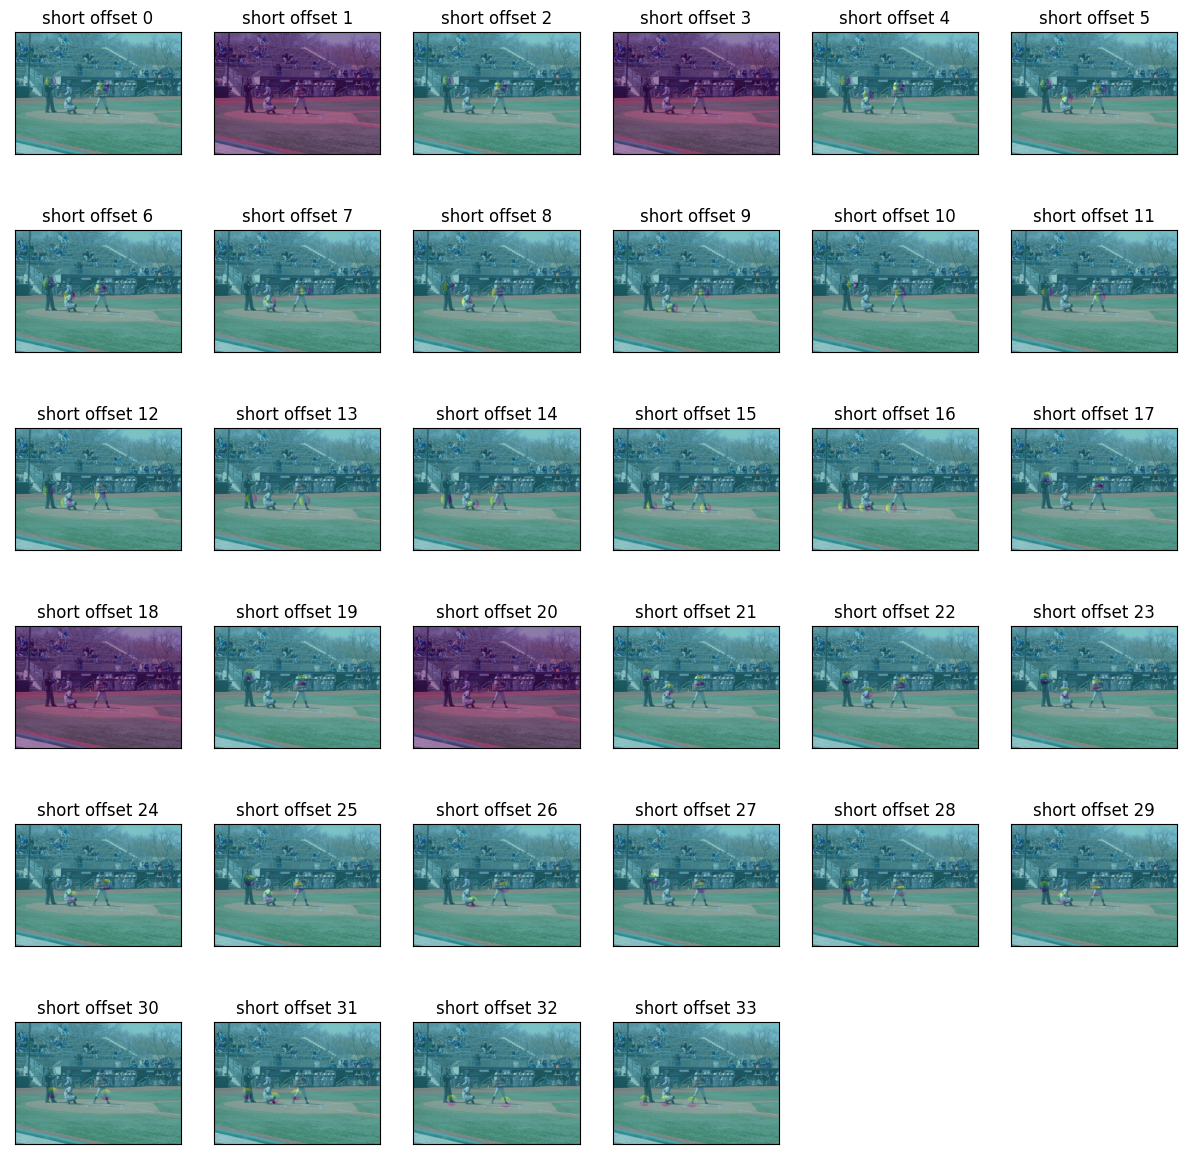

In [6]:
short_offset = tf.cast(pred_data.compute_short_offsets(), tf.float32)
figure = plt.figure(figsize=(15,15))
for i in range(34):
    plt.subplot(6,6, i+1, title='short offset {}'.format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    plt.imshow(short_offset[:, :, i],alpha=0.5)